# Part A 

# Part A Q1

Q1 A Refer above table and find the joint probability of the people who planned to purchase and actually placed an order.

Ans:
Total number of people planned to purchase and actually placed order = 400
Total number of people = 2000
Probabilty of people planned to purchase and actually placed order 
= 500 /2000 
= 0.2

Q1 B Refer to the above table and find the joint probability of the people who planned to purchase and actually placed an order, given that people planned to purchase.

Ans:
Joint probability of people Planned to purchase and actually purchased , given that people planned to purchase 
= Probability of People Planned to purchase and actually placed an order/Probability of People Planned to purchase 
= (400/2000) / (500/2000) = 0.8

# Part A Q2 

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats

#Probability Failure rate for the manufactured item
p_fail = 0.05

#Total no of sample
n = 10

k = np.arange(0,11)

#Calculate binomial distribution
binomial = stats.binom.pmf(k,n,p_fail)

#Q2 A- Probability that none of the items are defective

print ("Probability that none of the items are defective: ", binomial[0] )

#Q2 B- Probability that exactly one  of the items are defective
print ("Probability that exactly one  of the items are defective: ", binomial[1] )

#Q2 C- Probability that two or fewer of the items are defective
cum_binom = stats.binom.cdf(k,n,p_fail)
#print ("Probability that two or fewer of the items are defective: ", binomial[0] + binomial[1] + binomial[2] )
print ("Probability that two or fewer of the items are defective: ", cum_binom[2] )

#Q2 D- Probability that Three or more of the items are defective
#print ("Probability that Three or more of the items are defective: ", 1- (binomial[0] + binomial[1] + binomial[2]) )
print ("Probability that Three or more of the items are defective: ", 1- cum_binom[2] )

Probability that none of the items are defective:  0.5987369392383789
Probability that exactly one  of the items are defective:  0.3151247048623047
Probability that two or fewer of the items are defective:  0.9884964426207031
Probability that Three or more of the items are defective:  0.01150355737929687


# Part A Q3

Probability that Salesman will sell some cars:  0.950212931632136
Probability that Salesman will sell  two or more, but less than 5 cars:  0.6161149710523164


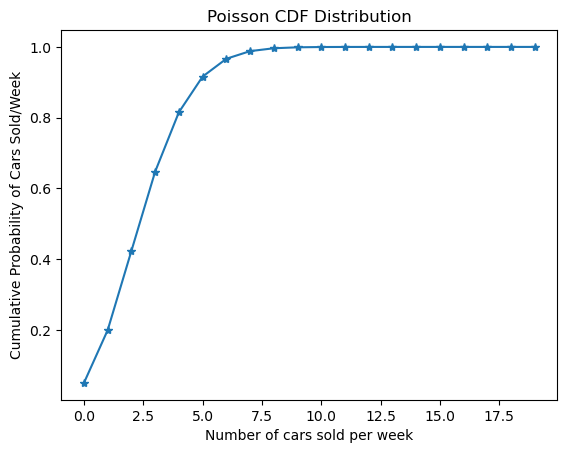

In [2]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

#Rate of Car Sale per week 
rate = 3

n = np.arange(0,20)

poisson = stats.poisson.pmf(n,rate)
#Calculate Cumulative Distribution
poisson_cdf = stats.poisson.cdf(n,rate)

#Q3 A
print ("Probability that Salesman will sell some cars: ",1-poisson_cdf[0])

#Q3 B
print ("Probability that Salesman will sell  two or more, but less than 5 cars: ",poisson_cdf[4]- poisson_cdf[1])

#Q3 C
plt.plot(n,poisson_cdf, '*-')
plt.title('Poisson CDF Distribution')
plt.xlabel('Number of cars sold per week')
plt.ylabel('Cumulative Probability of Cars Sold/Week')
plt.show()

# Part A Q4

In [3]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats  import binom

#Total no of trials
n = 3
# Probability of success
p = 0.868

k = np.arange(0,11)
binomial = binom.pmf(k=k, n=n, p=p)

#4.A. What is the probability that all three orders will be recognised correctly? 
print ("Probability that all three orders will be recognised correctly : P (X=3) : ", binomial[3] )
#4.B. What is the probability that none of the three orders will be recognised correctly? 
print ("What is the probability that none of the three orders will be recognised correctly : P (X=0) : ", binomial[0] )
#4.C. What is the probability that at least two of the three orders will be recognised correctly? 
print ("Probability that that at least two of the three orders will be recognised correctly : P ( X>= 2) : ", binomial[2] + binomial[3] )

Probability that all three orders will be recognised correctly : P (X=3) :  0.653972032
What is the probability that none of the three orders will be recognised correctly : P (X=0) :  0.002299968
Probability that that at least two of the three orders will be recognised correctly : P ( X>= 2) :  0.952327936


# Part A Q5

Explain 1 real life industry scenario (other than the ones mentioned above) where you can use theconcepts learnt in this module of Applied Statistics to get data driven business solution.

Ans:
Probability that 80% of total employees will finish mandatory training based on population data received from last three financial year.

# Part B

# Part B Q1 
Read the data set, clean the data and prepare final dataset to be used for analysis.

In [4]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats  import binom
import matplotlib.pyplot as plt
#%matplotlib inline
import seaborn as sns

#Read the data set

basket_df = pd.read_csv("Basketball.csv")

#Check data contents and types
print (basket_df.head())
print (basket_df.info())

     Team  Tournament Score PlayedGames WonGames DrawnGames LostGames  \
0  Team 1          86  4385        2762     1647        552       563   
1  Team 2          86  4262        2762     1581        573       608   
2  Team 3          80  3442        2614     1241        598       775   
3  Team 4          82  3386        2664     1187        616       861   
4  Team 5          86  3368        2762     1209        633       920   

  BasketScored BasketGiven TournamentChampion Runner-up TeamLaunch  \
0         5947        3140                 33        23       1929   
1         5900        3114                 25        25       1929   
2         4534        3309                 10         8       1929   
3         4398        3469                  6         6   1931to32   
4         4631        3700                  8         7       1929   

   HighestPositionHeld  
0                    1  
1                    1  
2                    1  
3                    1  
4              

# Part B Q2
Perform detailed statistical analysis and EDA using univariate, bi-variate and multivariate EDA techniques to get data driven insights on recommending which teams they can approach which will be a deal win for them. Also as a data and statistics expert you have to develop a detailed performance report using this data.

In [5]:
#Clean data and  prepare final dataset

#Step -1 
#Replace all values with '-' as Number - 0
basket_df.replace(to_replace='-', value=0, inplace =True)

#Step-2
#Truncate TeamLunch column values to 4 digits Year as it contains many special chars
basket_df['TeamLaunch'] = basket_df['TeamLaunch'].apply(lambda year: str(year)[:4])

#Step-3
#Most of columns although integer are presented as object datatype.Let's convert those
col = basket_df.columns
basket_df[col[1:]] = basket_df[col[1:]].astype('int64')
basket_df['Tournament'] = basket_df['Tournament'].astype('int64')

#Step-5
#Print data frame format to ensure we have correct data types now for further analysis
print (basket_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Team                 61 non-null     object
 1   Tournament           61 non-null     int64 
 2   Score                61 non-null     int64 
 3   PlayedGames          61 non-null     int64 
 4   WonGames             61 non-null     int64 
 5   DrawnGames           61 non-null     int64 
 6   LostGames            61 non-null     int64 
 7   BasketScored         61 non-null     int64 
 8   BasketGiven          61 non-null     int64 
 9   TournamentChampion   61 non-null     int64 
 10  Runner-up            61 non-null     int64 
 11  TeamLaunch           61 non-null     int64 
 12  HighestPositionHeld  61 non-null     int64 
dtypes: int64(12), object(1)
memory usage: 6.3+ KB
None


In [6]:
print (basket_df.head())

     Team  Tournament  Score  PlayedGames  WonGames  DrawnGames  LostGames  \
0  Team 1          86   4385         2762      1647         552        563   
1  Team 2          86   4262         2762      1581         573        608   
2  Team 3          80   3442         2614      1241         598        775   
3  Team 4          82   3386         2664      1187         616        861   
4  Team 5          86   3368         2762      1209         633        920   

   BasketScored  BasketGiven  TournamentChampion  Runner-up  TeamLaunch  \
0          5947         3140                  33         23        1929   
1          5900         3114                  25         25        1929   
2          4534         3309                  10          8        1929   
3          4398         3469                   6          6        1931   
4          4631         3700                   8          7        1929   

   HighestPositionHeld  
0                    1  
1                    1  
2    

In [7]:
#Step - 4
# Create a new column as Winning Percentage 
win_percent = basket_df['WonGames'] / basket_df['PlayedGames']
basket_df.insert(loc=13, column='WinningPercentage', value=win_percent)

In [8]:
# Add WinningRatio features
win_rat = basket_df['WonGames'] / basket_df['LostGames']
basket_df.insert(loc=basket_df.shape[1], column='WinningRatio', value=win_rat)

# Add Basket Ratio features
bas_rat = basket_df['BasketScored'] / basket_df['BasketGiven']
basket_df.insert(loc=basket_df.shape[1], column='BasketRatio', value=bas_rat)

basket_df.fillna(0)

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld,WinningPercentage,WinningRatio,BasketRatio
0,Team 1,86,4385,2762,1647,552,563,5947,3140,33,23,1929,1,0.596307,2.925400,1.893949
1,Team 2,86,4262,2762,1581,573,608,5900,3114,25,25,1929,1,0.572411,2.600329,1.894669
2,Team 3,80,3442,2614,1241,598,775,4534,3309,10,8,1929,1,0.474751,1.601290,1.370202
3,Team 4,82,3386,2664,1187,616,861,4398,3469,6,6,1931,1,0.445571,1.378630,1.267801
4,Team 5,86,3368,2762,1209,633,920,4631,3700,8,7,1929,1,0.437726,1.314130,1.251622
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,Team 57,1,34,38,8,10,20,38,66,0,0,2009,20,0.210526,0.400000,0.575758
57,Team 58,1,22,30,7,8,15,37,57,0,0,1956,16,0.233333,0.466667,0.649123
58,Team 59,1,19,30,7,5,18,51,85,0,0,1951,16,0.233333,0.388889,0.600000
59,Team 60,1,14,30,5,4,21,34,65,0,0,1955,15,0.166667,0.238095,0.523077


In [9]:
# Create a new column as loosing percentage
lost_percent = basket_df['LostGames'] / basket_df['PlayedGames']
basket_df.insert(loc=14, column='LoosingPercentage', value=lost_percent)



Correlation number
                     Tournament     Score  PlayedGames  WonGames  DrawnGames  \
Tournament             1.000000  0.981441     0.998677  0.971954    0.989387   
Score                  0.981441  1.000000     0.979824  0.997240    0.958452   
PlayedGames            0.998677  0.979824     1.000000  0.967641    0.994053   
WonGames               0.971954  0.997240     0.967641  1.000000    0.939844   
DrawnGames             0.989387  0.958452     0.994053  0.939844    1.000000   
LostGames              0.949863  0.880040     0.956503  0.852785    0.973156   
BasketScored           0.975059  0.996656     0.970127  0.999318    0.942668   
BasketGiven            0.987828  0.944263     0.990129  0.926234    0.992579   
TournamentChampion     0.589072  0.714280     0.574716  0.752204    0.503472   
Runner-up              0.645876  0.764278     0.632921  0.797350    0.566269   
TeamLaunch            -0.603151 -0.543432    -0.587451 -0.543854   -0.577616   
HighestPositionHeld  

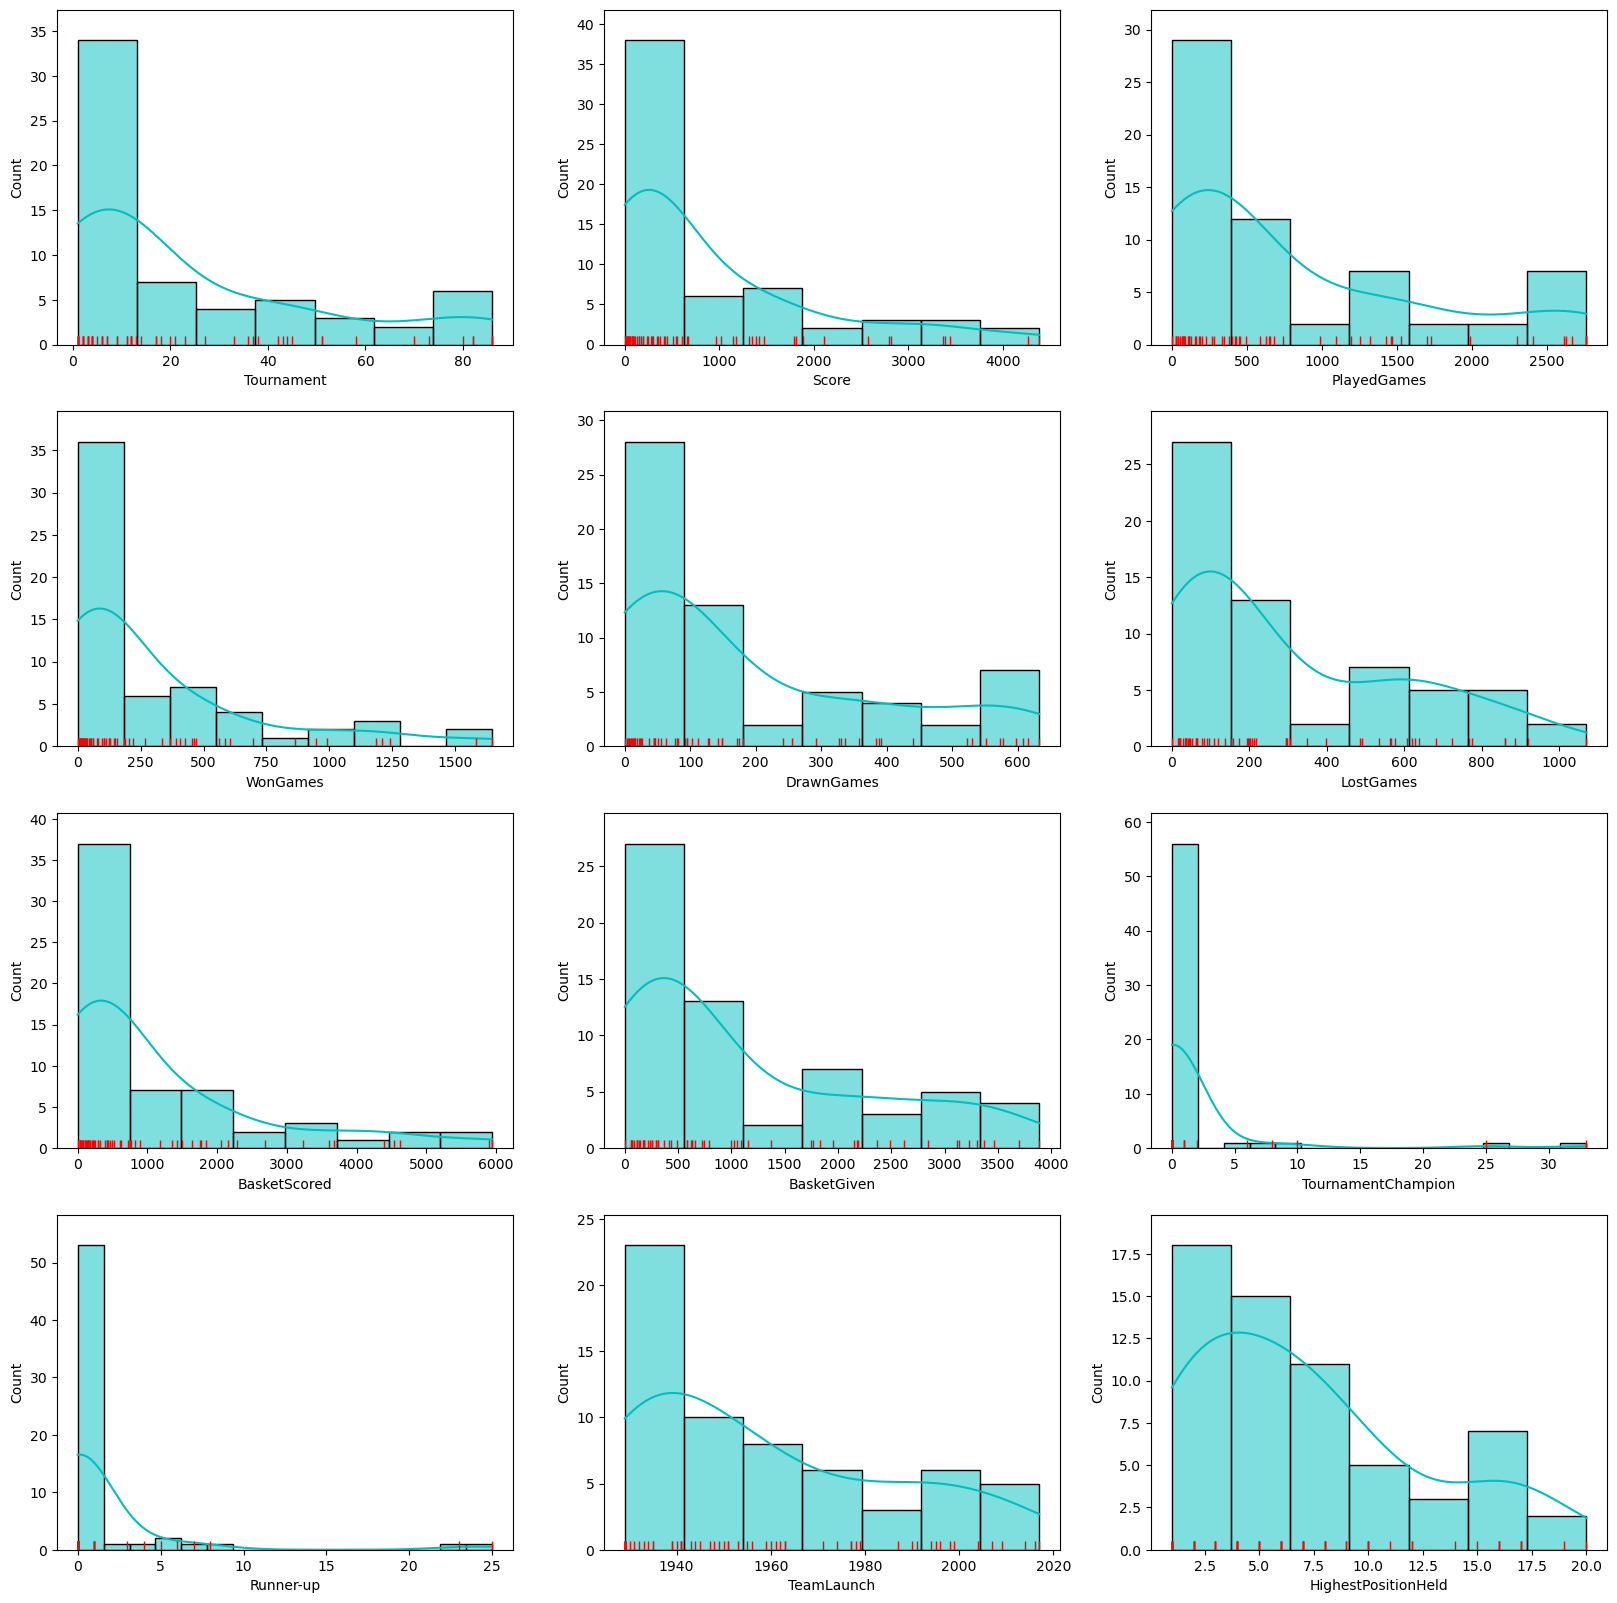

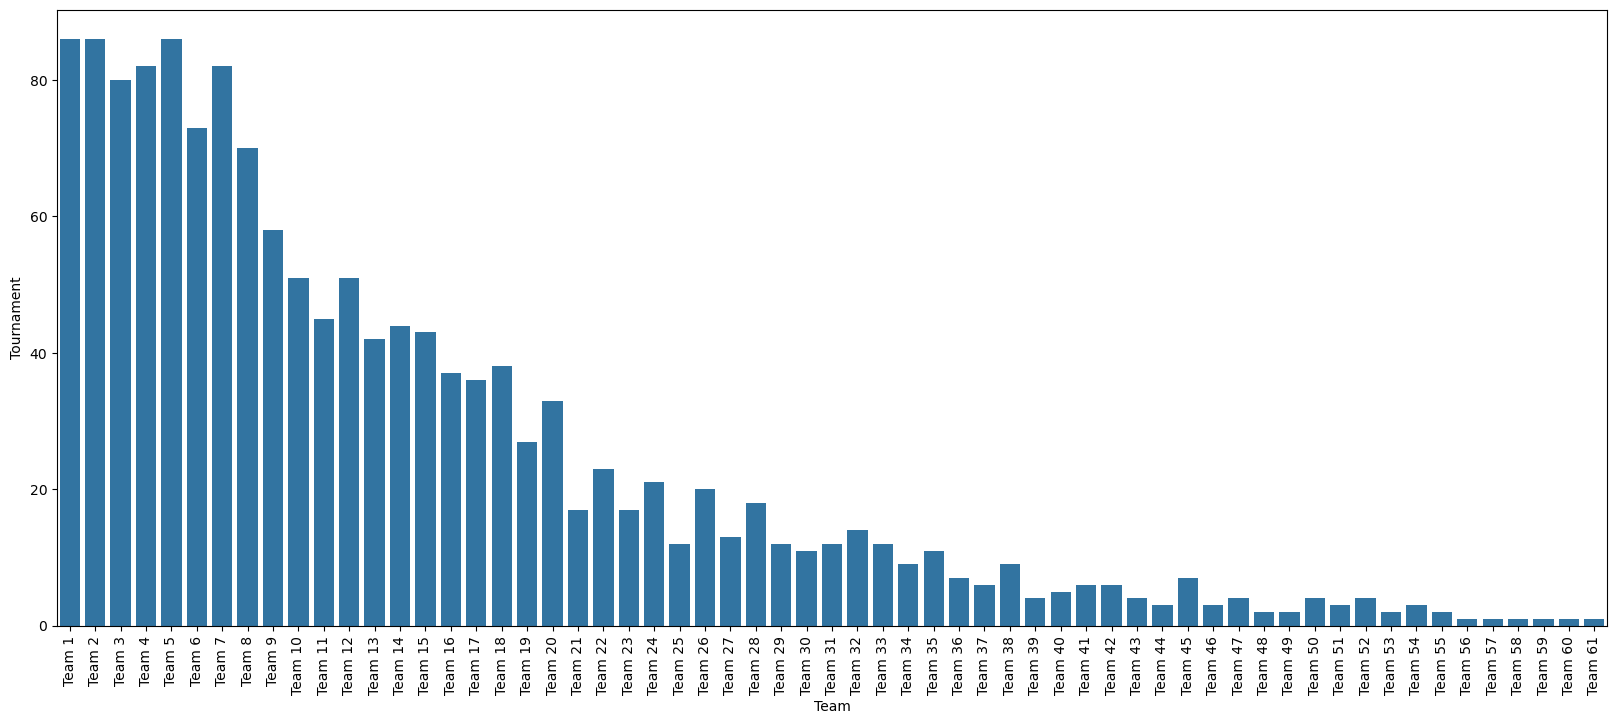

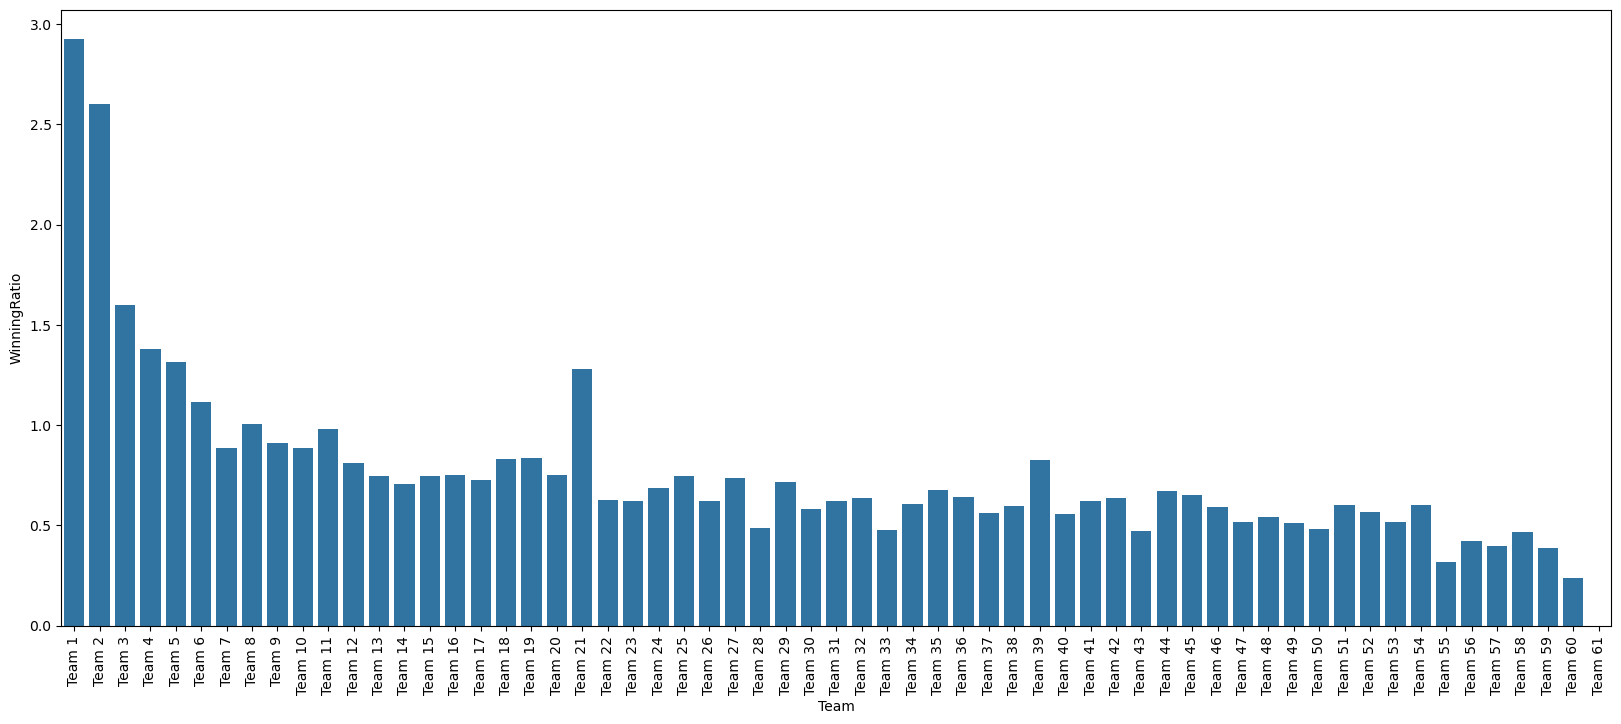

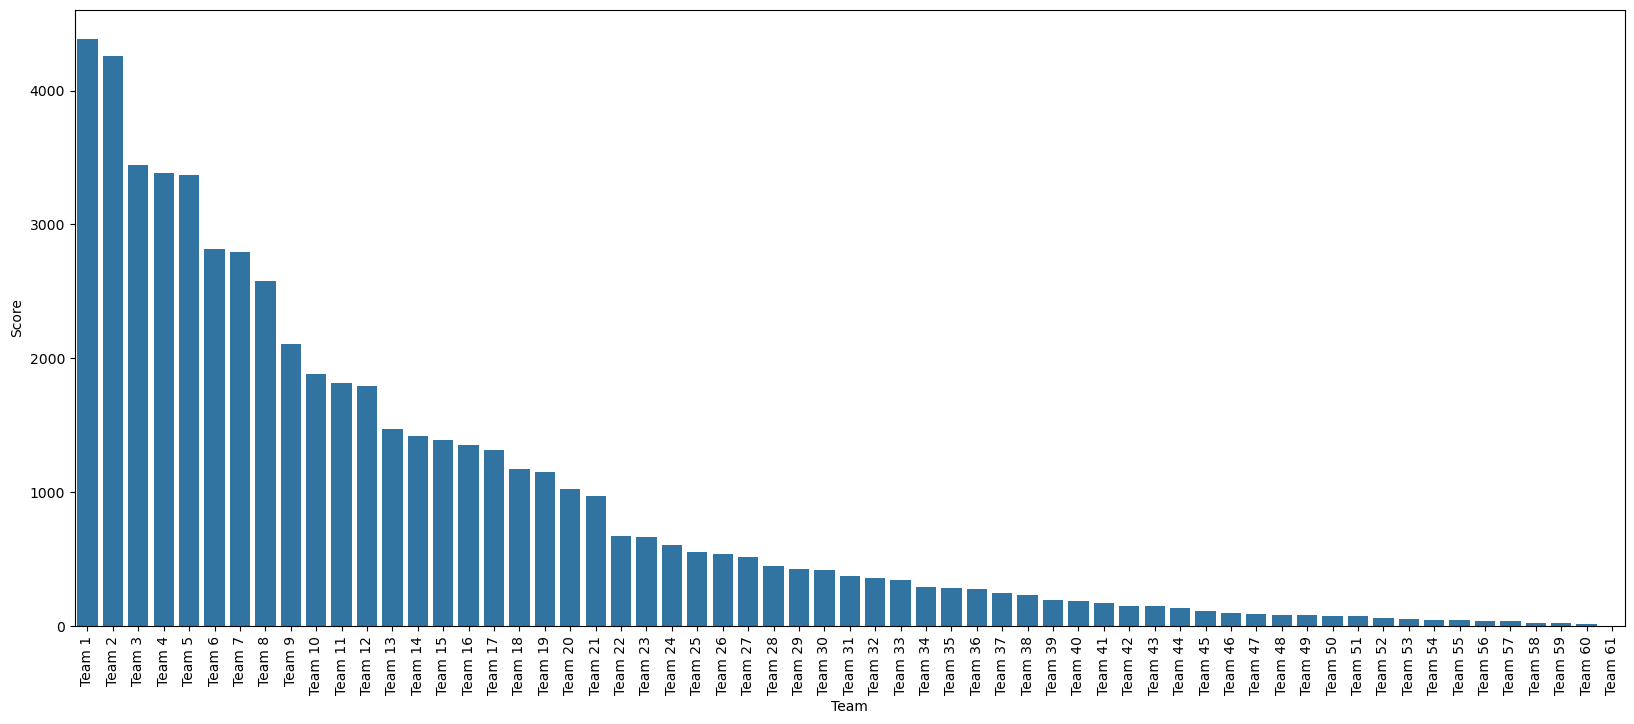

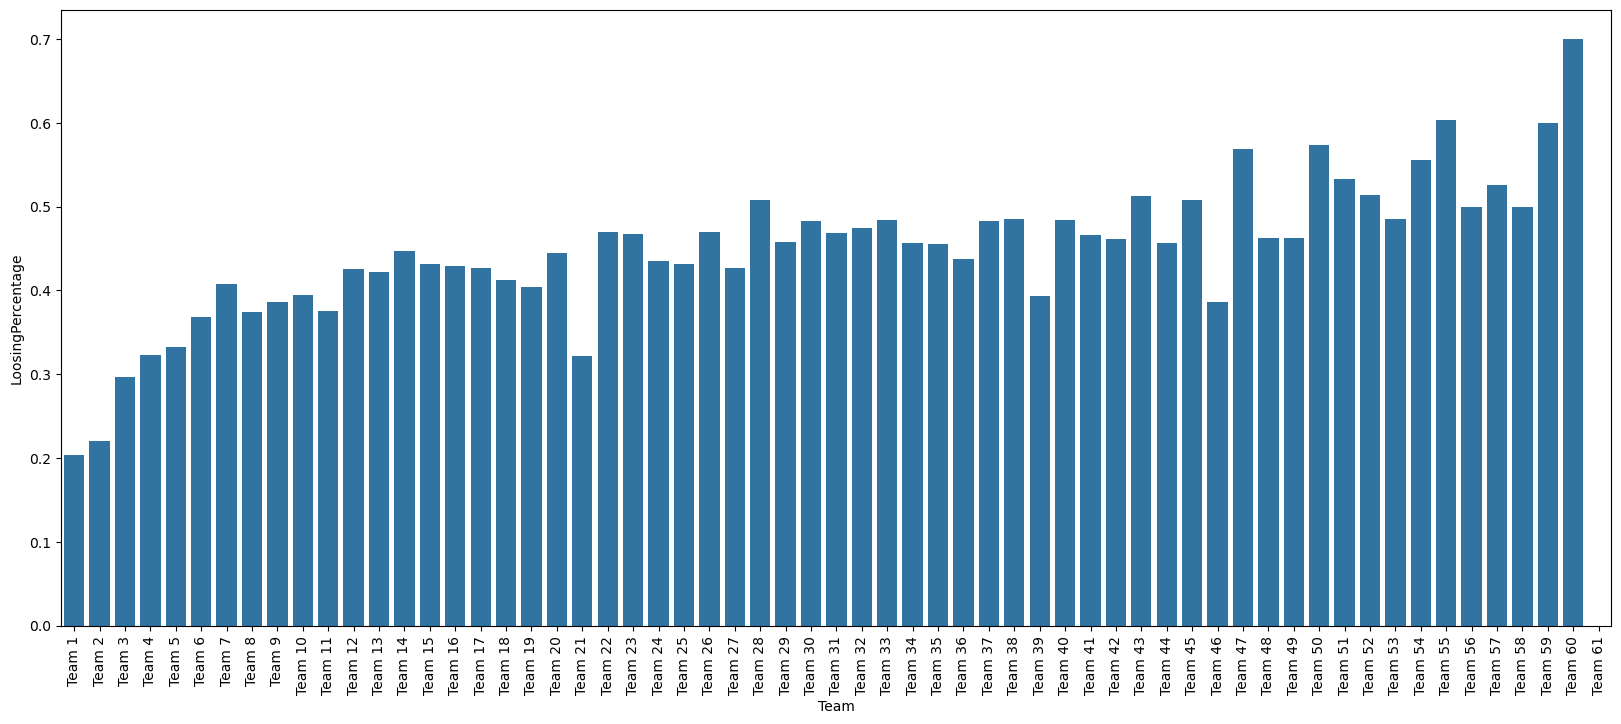

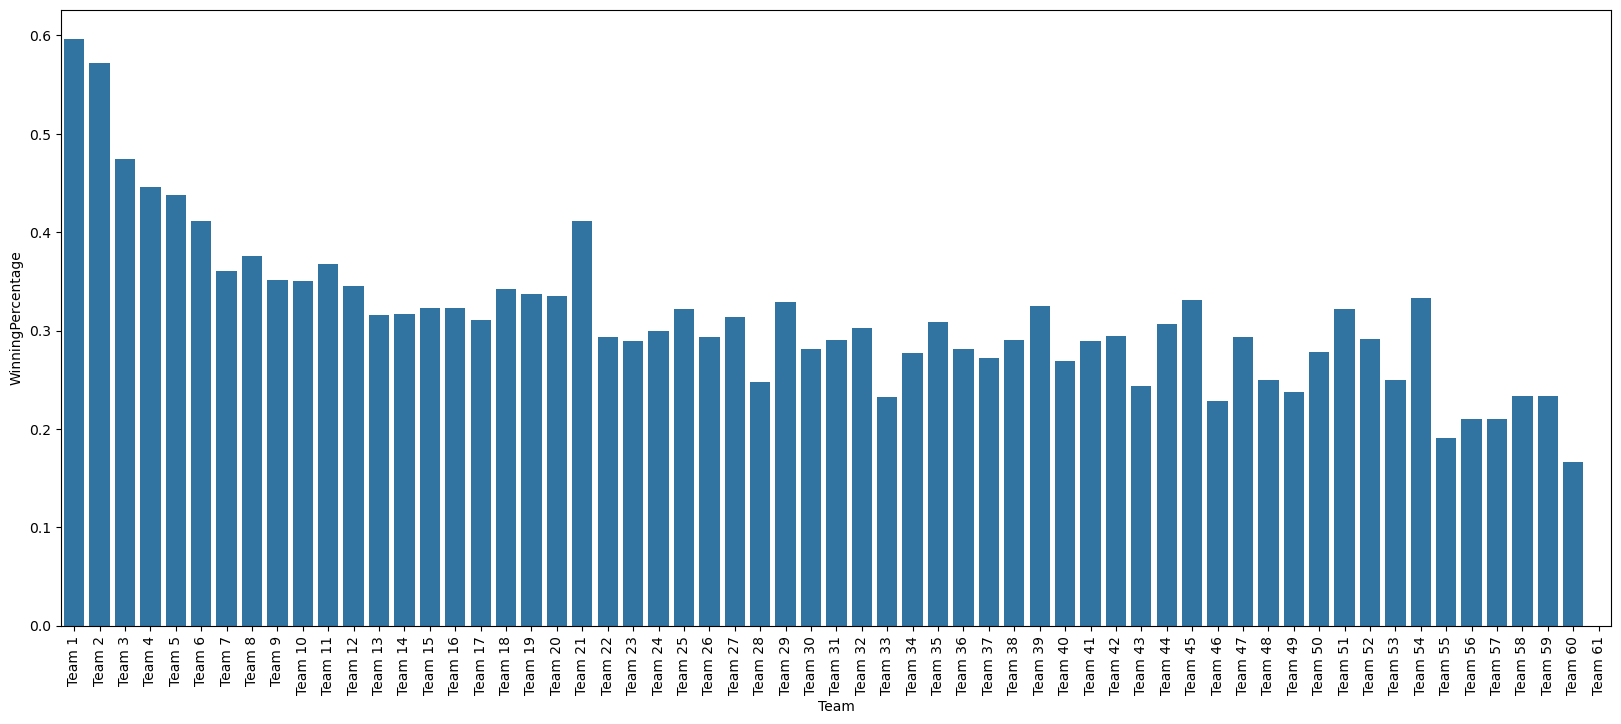

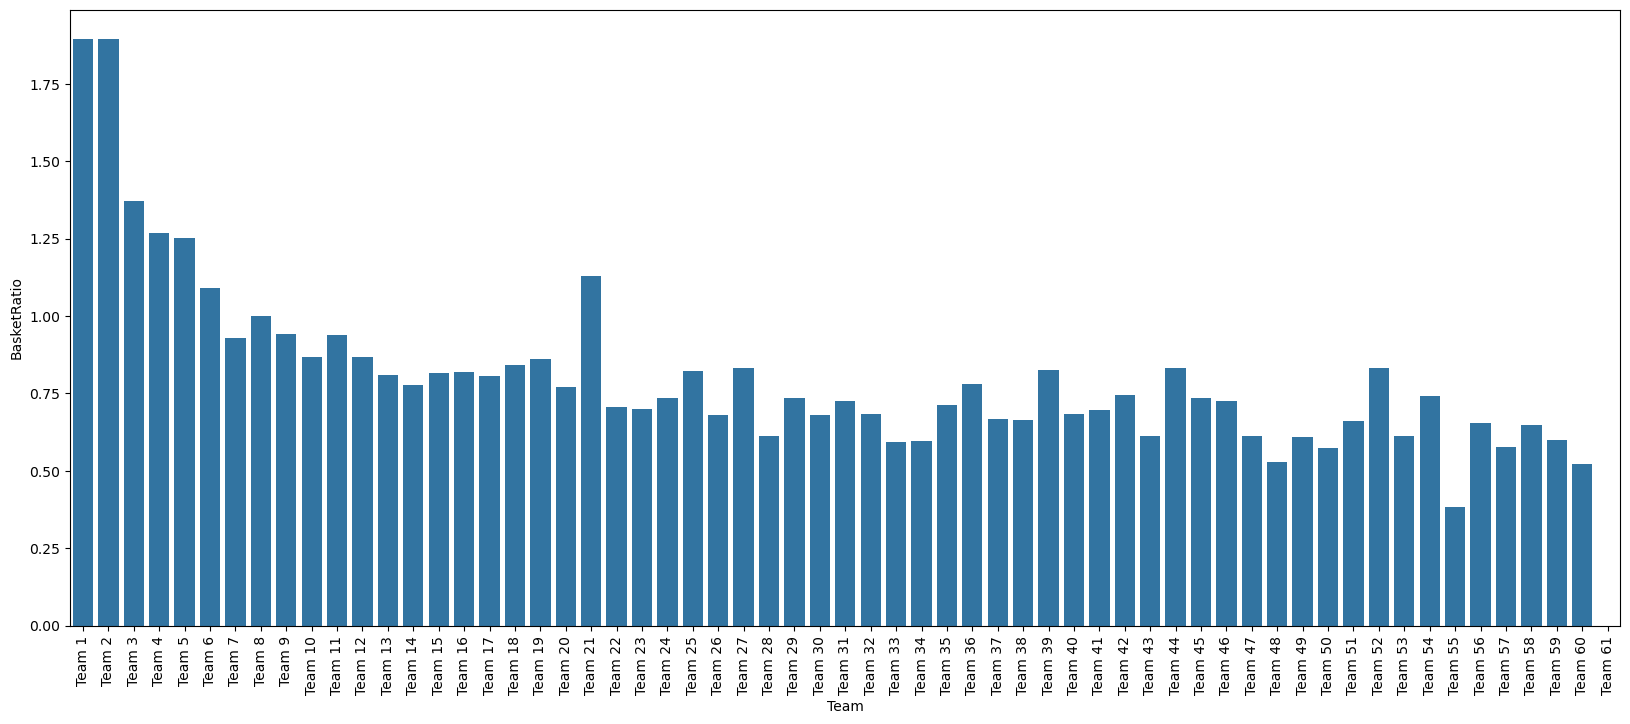

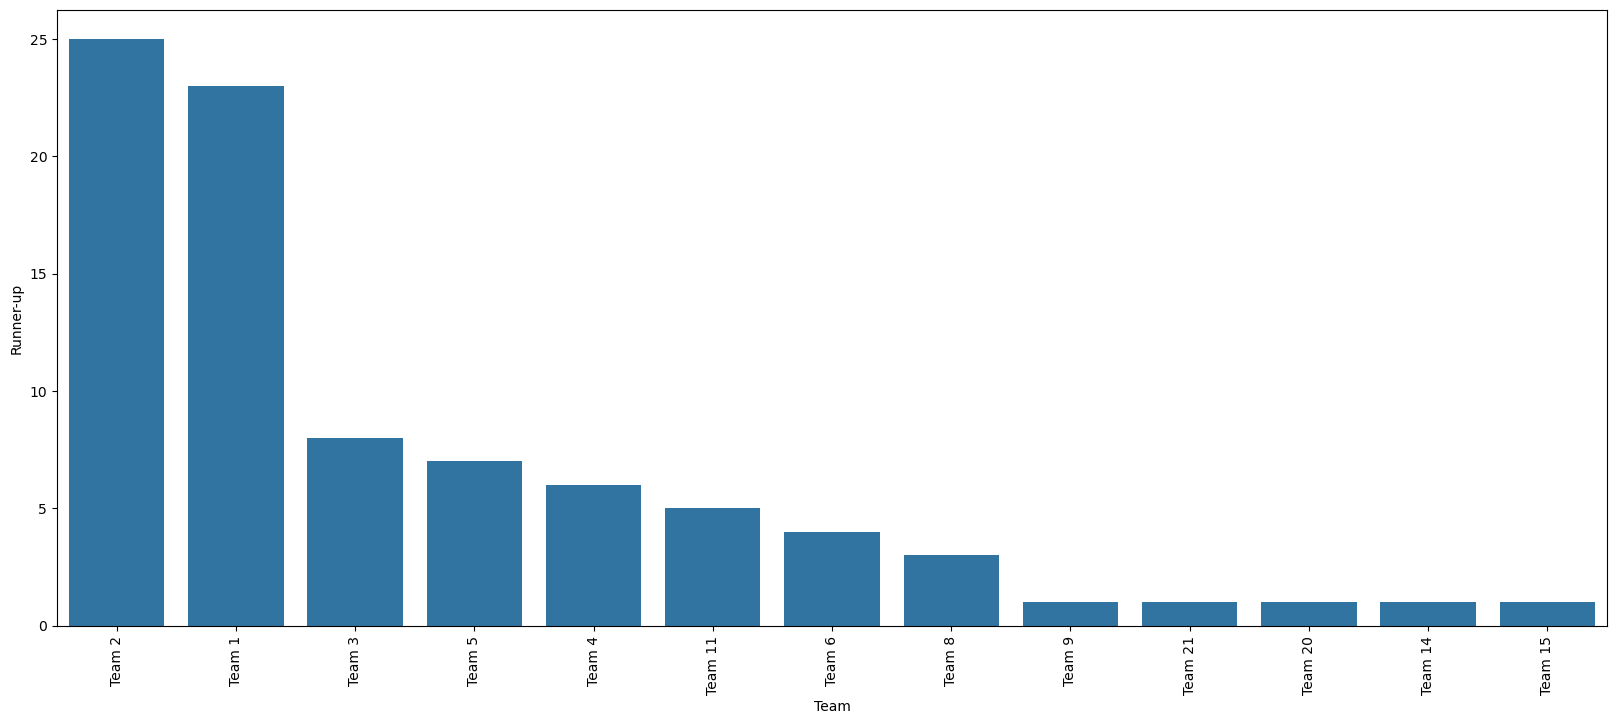

In [10]:




#Step-5
#Dispay key statistic
attrs = ['Tournament','Score','PlayedGames','WonGames','DrawnGames','LostGames','BasketScored','BasketGiven','TournamentChampion','Runner-up','TeamLaunch','HighestPositionHeld']

plt.figure(figsize=(20,20))

index = 1
for col in basket_df[attrs]:
    plt.subplot(4,3,index)
    ax = plt.gca()
    # Use histplot on the current axes instead of displot (which creates its own figure)
    sns.histplot(basket_df[col].dropna(), kde=True, color="c", ax=ax)
    # add a rugplot separately
    try:
        sns.rugplot(basket_df[col].dropna(), ax=ax, color="r")
    except Exception:
        pass
    index += 1
    
# No of tournaments played by teams
plt.figure(figsize=(20,8))
sns.barplot(data=basket_df,x= basket_df['Team'], y= basket_df['Tournament'])
plt.xticks(rotation=90)       

# Winning ratio
plt.figure(figsize=(20,8))
sns.barplot( data=basket_df, x=basket_df['Team'],y=basket_df['WinningRatio'])
plt.xticks(rotation=90)

# Score
plt.figure(figsize=(20,8))
sns.barplot( data=basket_df, x=basket_df['Team'],y=basket_df['Score'])
plt.xticks(rotation=90)

# Loosing Percentage
plt.figure(figsize=(20,8))
sns.barplot(data=basket_df, x=basket_df['Team'],y= basket_df['LoosingPercentage'])
plt.xticks(rotation=90)

#Winning percentage
plt.figure(figsize=(20,8))
sns.barplot(data=basket_df, x=basket_df['Team'],y=basket_df['WinningPercentage'])
plt.xticks(rotation=90)

# Basket Ratio
plt.figure(figsize=(20,8))
sns.barplot(data=basket_df, x=basket_df['Team'],y=basket_df['BasketRatio'])
plt.xticks(rotation=90)

# Check most runner-up
plt.figure(figsize=(20,8))
bb = basket_df[['Team','Runner-up']].sort_values(by="Runner-up", ascending=False).where(lambda x: x["Runner-up"] > 0)
sns.barplot(data=bb, x=bb['Team'], y = bb['Runner-up'])
plt.xticks(rotation=90)

corr = basket_df.corr(numeric_only=True)
print ("Correlation number")
print (corr)

Conclusion:
1. Data on the whole is right skewed except TournamentChampion and 	Runner-up.
2. The team who has played more games has higher winning percentage and lesser Loosing percentage.
   The team who played lesser number of games, 
3. Teams 1 - 10 and Team 21 winning percentage above Mean winning percentage
   basket_df['WinningPercentage'].mean() = 0.31364789990145003
4. Eventhough the score of team 21 seems less the winning probability seems higher.
5. Team 7 basket ratio poor even though they are in top 10 team which has scored more baskets.
5. Team 1 seems to be a team with matured experience and game as their number winning percentage is high.

# Part B Q3

Please include any improvements or suggestions to the association management on quality, quantity, variety, velocity, veracity etc. on the data points collected by the association to perform a better data analysis in future. At-least 1 suggestion for each point.

Tournaments - Many of the data columns are least significant for such an evaluation
Score - The overall score can be misguiding at times.Instead Basket ratio or difference between basket scored and basket given can be referred.
Played Games - For many teams the number of games are very less which may impact the quality of predictions
Won,Lost,Drawn Games - Notable gaps are there. Additional column to include cancelled games could have been provided.
HighestPositionHeld- Column does not give any significance and is not a key column to predict winning team.

# Part C

# Part C Q1

Read the csv file

In [11]:
companyx_df = pd.read_csv("CompanyX_EU.csv")

# Part C Q2

Q2A - Check the datatypes of each attribute

In [12]:
print (companyx_df.dtypes)

Startup           object
Product           object
Funding           object
Event             object
Result            object
OperatingState    object
dtype: object


Q2B - Check for null values in the attributes.

In [13]:
print (companyx_df.isna().sum())

Startup             0
Product             6
Funding           214
Event               0
Result              0
OperatingState      0
dtype: int64


# Part C Q3

Q3A Drop the null values

In [14]:
companyx_df_new = companyx_df.dropna().copy(deep=True)
print (companyx_df_new.isna().sum())

Startup           0
Product           0
Funding           0
Event             0
Result            0
OperatingState    0
dtype: int64


Q3B Convert the 'Funding' features to a nuemrical value.

In [15]:
companyx_df_new.loc[:,'Funds_in_million'] = companyx_df_new['Funding'].apply(lambda x: float(x[1:-1])/1000 if x[-1] == 'K' else (float(x[1:-1])*1000 if x[-1] == 'B' else float(x[1:-1])))

Q3 C Plot box plot for funds in million

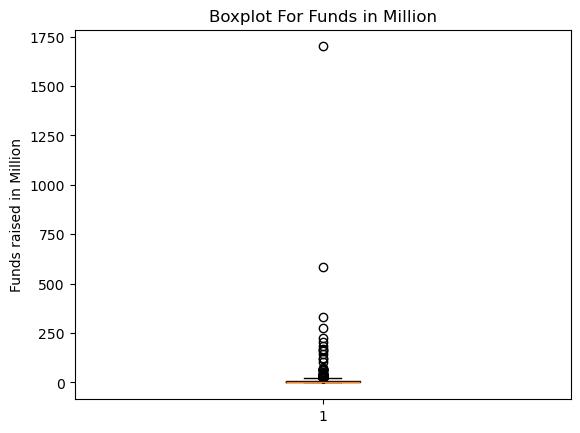

In [16]:
plot = plt.boxplot(companyx_df_new.Funds_in_million)
plt.title('Boxplot For Funds in Million')
plt.ylabel("Funds raised in Million")
plt.show()

Q3 D Check the number of outliers greater than the upper fence

In [17]:
upper_fence = plot['caps'][1].get_data()[1][1]
print ("upper_fence = ", upper_fence)

Number_of_outliers = len(companyx_df_new[companyx_df_new.Funds_in_million > upper_fence])
print("Number_of_outliers = ", Number_of_outliers)

upper_fence =  22.0
Number_of_outliers =  60


Q3 E Check frequency of the Operating State features classes

c:\Users\subha\anaconda3\Lib\site-packages\seaborn\distributions.py:2125: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
c:\Users\subha\anaconda3\Lib\site-packages\seaborn\distributions.py:2125: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


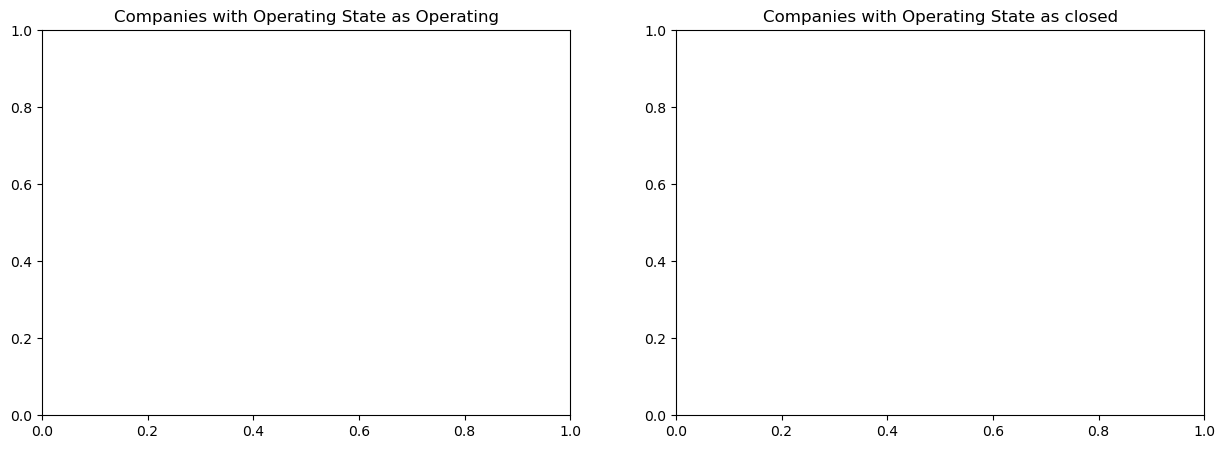

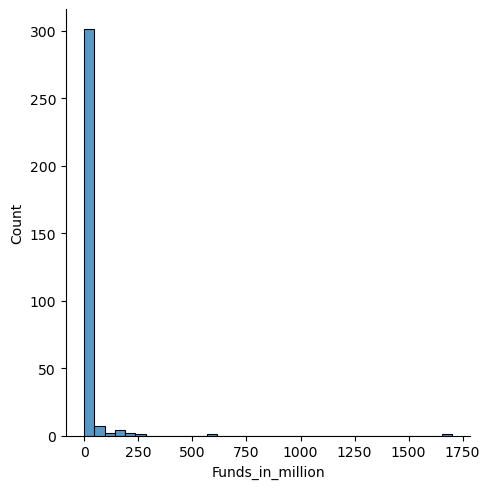

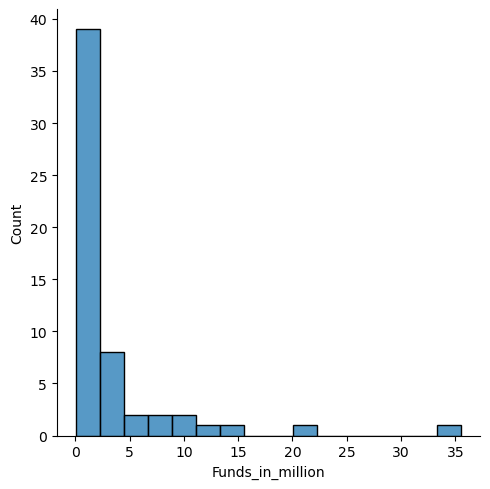

In [18]:
fig, ax = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

sns.displot(companyx_df_new.loc[companyx_df_new.OperatingState == 'Operating', 'Funds_in_million'], ax = ax[0])
sns.displot(companyx_df_new.loc[companyx_df_new.OperatingState =='Closed', 'Funds_in_million'], ax = ax[1])

ax[0].set_title('Companies with Operating State as Operating')
ax[1].set_title('Companies with Operating State as closed')
plt.show()

# Part C Q4

Q4 A Is there any significant difference between Funds raised by companies that are still operating vs companies that closed down?

Ans - Both plots look very much simillar. But difficult to compare and comment on differences.

Q4 B Write the null hypothesis and alternative hypothesis

Ans - 
Null hypothesis (Ho) : There is no difference between the two means
Alternate hypothesis (Ha) : There is significant difference between the two means

Q4 C - Test for significance and conclusion

In [19]:
from scipy.stats  import binom,uniform,norm,t,ttest_1samp, ttest_ind
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from statsmodels.stats.weightstats import ztest

sample1 = companyx_df_new.loc[companyx_df_new.OperatingState == 'Operating', 'Funds_in_million']
sample2 = companyx_df_new.loc[companyx_df_new.OperatingState =='Closed', 'Funds_in_million']

#Default level of Significance = 0.05
alpha = 0.05   

#4 C Test for significancnce and Conclusion

#Calculate teststatitistic and p_value
test_statistic, p_value = ztest(sample1, sample2)
print ("Useing ztest Method")
if p_value <= alpha:
    print(f'Reject the Null hypothesis')
else:
    print(f'Failed to reject the Null hypothesis')

print ("Useing ttest Method")
test_statistic, p_value = ttest_ind(sample1, sample2)

if p_value <= alpha:
    print(f'Reject the Null hypothesis')
else:
    print(f'Failed to reject the Null hypothesis')


Useing ztest Method
Failed to reject the Null hypothesis
Useing ttest Method
Failed to reject the Null hypothesis


Conclusion : 
Since the p-value calculated above in both the methods greate than 0.05 (alpha), the difference is not significant and we fail to reject the Null hypothesis

Q4 D Make a copy of the original data frame

In [20]:
companyx_df_new_copy = companyx_df.copy(deep = True)

Q4 E Check frequency distribution of Result variables.

In [21]:
print (companyx_df_new_copy.Result.value_counts())

Result
Contestant         488
Finalist            84
Audience choice     41
Winner              26
Runner up           23
Name: count, dtype: int64


Q4 F Calculate percentage of winners that are still operating and percentage of contestants that are still operating

In [22]:
winners = companyx_df_new_copy.Result.value_counts()[1:].sum()
contestants = companyx_df_new_copy.Result.value_counts()['Contestant']

contestants_operating = companyx_df_new_copy.OperatingState[companyx_df_new_copy.Result == 'Contestant'].value_counts().loc['Operating']
winners_operating = companyx_df_new_copy.OperatingState[companyx_df_new_copy.Result != 'Contestant'].value_counts().loc['Operating']

print ("Percentage of winners that are still operating : ", round(winners_operating/winners,2)*100)

print ("Percentage of contestants that are still operating : ", round(contestants_operating/contestants,2)*100)

Percentage of winners that are still operating :  76.0
Percentage of contestants that are still operating :  68.0


 Q4 G Write your hypothesis comparing the proportion of companies that are operating between winners and contestants:

Ans-
Null hypothesis (Ho) : The proportion of companies that are operating between winners and contestants are same.
Alternate hypothesis (Ha) : There is significant difference between the proportion of companies that are operating between winners and contestants

Q4 H Test for significance and conclusion

In [23]:
from statsmodels.stats.proportion import proportions_ztest

test_statistic, p_value = proportions_ztest([contestants_operating, winners_operating], [contestants, winners])

if p_value <= alpha:
    print('The p-value is less than  alpha. Hence we reject the Null hypothesis')
else:
    print(f'The p-value is more  than  alpha. Hence we failed to reject the Null hypothesis')

The p-value is less than  alpha. Hence we reject the Null hypothesis


Q4 I Select only the Event that has ‘disrupt’ keyword from 2013 onwards.

In [24]:
print (companyx_df_new[companyx_df_new.Event.apply(lambda x: 'Disrupt' in x)].Event.value_counts())

disrupted_events = companyx_df_new[companyx_df_new.Event.apply(lambda x: 'Disrupt' in x and int(x[-4:]) > 2013)].Event  
print ("Select only the Events that has disrupt keyword from 2013 onwards")
print (disrupted_events)

Event
Disrupt SF 2011         24
Disrupt NYC 2013        22
Disrupt SF 2013         22
Disrupt NY 2015         21
Disrupt NYC 2012        21
Disrupt SF 2012         20
Disrupt NYC 2011        19
Disrupt SF 2010         19
Disrupt SF 2014         19
Disrupt SF 2015         19
Disrupt SF 2016         17
Disrupt NYC 2014        16
Disrupt NY 2016         16
Disrupt NYC 2010        15
Disrupt London 2015     12
Disrupt London 2016     10
Disrupt EU 2014         10
Disrupt EU 2013          9
Disrupt Beijing 2011     7
Name: count, dtype: int64
Select only the Events that has disrupt keyword from 2013 onwards
3          Disrupt NY 2016
13         Disrupt SF 2015
14     Disrupt London 2016
16         Disrupt SF 2015
18        Disrupt NYC 2014
              ...         
633        Disrupt NY 2015
634        Disrupt SF 2015
635        Disrupt NY 2015
642        Disrupt SF 2014
646    Disrupt London 2015
Name: Event, Length: 140, dtype: object
